### Connectome-informed reservoir - Echo-State Network

This tutorial demonstrates how to use the conn2res toolbox to implement
a NeuroGym task varying both local and global dynamics.

In [1]:
import pandas as pd
import numpy as np
import os

# Load the data
data_saturday1 = pd.read_csv('DataSaturday1.csv')
data_saturday2 = pd.read_csv('DataSaturday2.csv')
data_saturday3 = pd.read_csv('DataSaturday3.csv')
data_saturday4 = pd.read_csv('DataSaturday4.csv')
data_tuesday1 = pd.read_csv('DataTuesday1.csv')
data_tuesday2 = pd.read_csv('DataTuesday2.csv')
data_tuesday3 = pd.read_csv('DataTuesday3.csv')
data_tuesday4 = pd.read_csv('DataTuesday4.csv')

In [64]:
# Create a list of all communes (nodes)
nodes = np.unique(np.concatenate((data_saturday2['From'].unique(), data_saturday2['To'].unique())))

In [65]:
# Create an empty connectivity matrix (unique nodes)
n_nodes = len(nodes)
conn_matrix = np.zeros((n_nodes, n_nodes))

In [66]:
# Map the communes to the indices
node_index = {node: i for i, node in enumerate(nodes)}

In [67]:
# Fill in with moving data
for _, row in data_saturday2.iterrows():
    from_node = row['From']
    to_node = row['To']
    count = row['Cnt']

    conn_matrix[node_index[from_node], node_index[to_node]] += count  # summiere die Counts

In [68]:
# Normalize
conn_matrix_normalized = conn_matrix / conn_matrix.sum(axis=1, keepdims=True)  # Zeilenweise Normalisierung

In [69]:
print("Dimensions of conn_matrix_normalized:", conn_matrix_normalized.shape)
print("Data type of conn_matrix_normalized:", conn_matrix_normalized.dtype)
print("Number of non-zero elements in conn_matrix_normalized:", np.count_nonzero(conn_matrix_normalized))
print("Minimum value in conn_matrix_normalized:", np.min(conn_matrix_normalized))
print("Maximum value in conn_matrix_normalized:", np.max(conn_matrix_normalized))
print("Mean value in conn_matrix_normalized:", np.mean(conn_matrix_normalized))
print("Standard deviation in conn_matrix_normalized:", np.std(conn_matrix_normalized))


Dimensions of conn_matrix_normalized: (356, 356)
Data type of conn_matrix_normalized: float64
Number of non-zero elements in conn_matrix_normalized: 5815
Minimum value in conn_matrix_normalized: 0.0
Maximum value in conn_matrix_normalized: 1.0
Mean value in conn_matrix_normalized: 0.0028089887640449437
Standard deviation in conn_matrix_normalized: 0.04743893921351464


In [70]:
# Speichern der Matrix als CSV
output_dir = '/content/connectivity_matrix/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

np.save(os.path.join(output_dir, 'connectivity_matrix.npy'), conn_matrix_normalized)

In [9]:
%pip install geopandas
%pip install shapely.geometry

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement shapely.geometry (from versions: none)
ERROR: No matching distribution found for shapely.geometry


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

# Load the commune info
kommune_lat_lon = pd.read_csv('KommuneLatLon.csv')

In [11]:
# Schritt 2: Lade die Konnektivitätsmatrix
conn_matrix = np.load('/content/connectivity_matrix/connectivity_matrix.npy')

In [12]:
print("Number of non-zero elements in conn_matrix_normalized:", np.count_nonzero(conn_matrix))

Number of non-zero elements in conn_matrix_normalized: 3871


In [13]:
# Schritt 3: Erstelle eine GeoDataFrame mit den Kommunen
geometry = [Point(xy) for xy in zip(kommune_lat_lon['longitude'], kommune_lat_lon['latitude'])]
gdf = gpd.GeoDataFrame(kommune_lat_lon, geometry=geometry)

In [14]:
# Schritt 4: Lade die Karte von Norwegen aus dem Shapefile
norway_map = gpd.read_file('countries')  
norway_map = norway_map[norway_map['NAME'] == "Norway"]  

<AxesSubplot:>

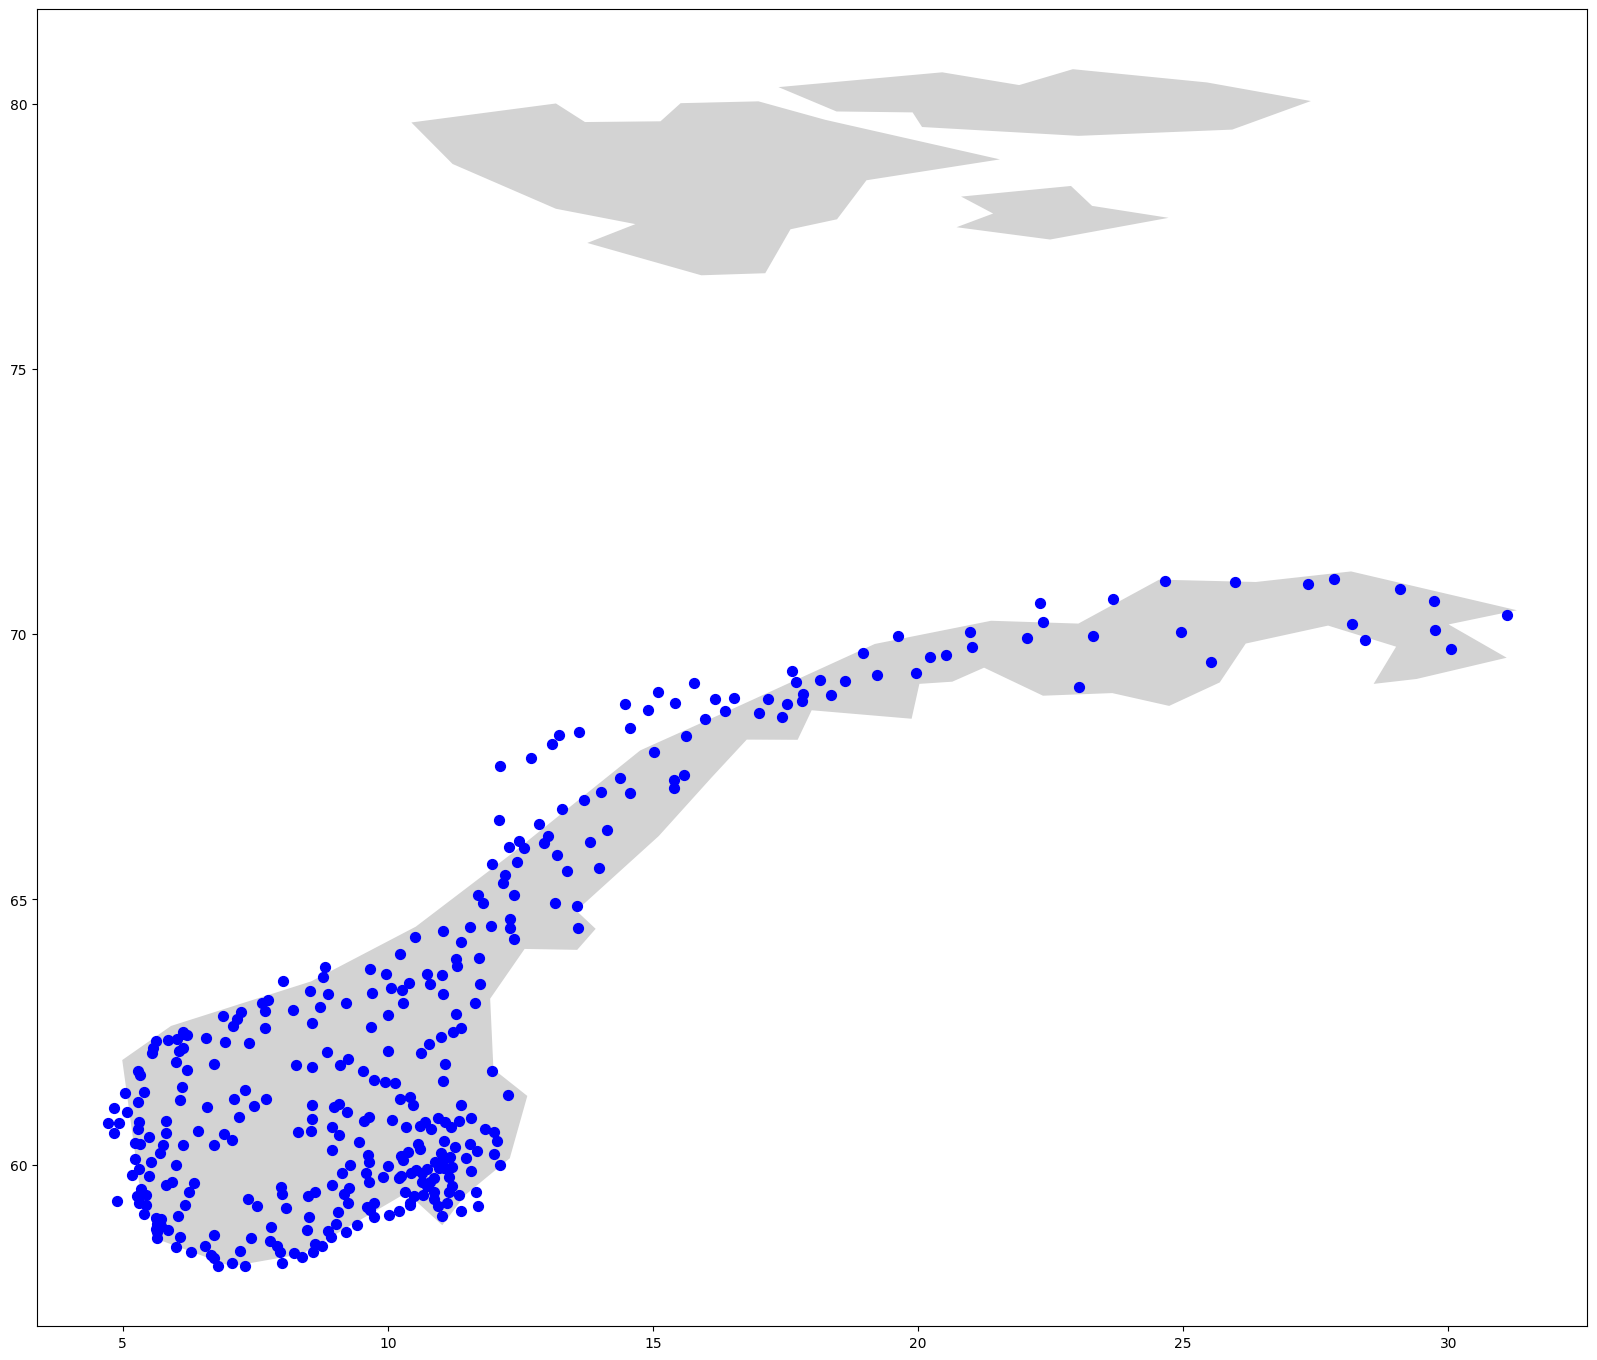

In [15]:
# Schritt 5: Zeichne die Karte
fig, ax = plt.subplots(figsize=(20, 20))
norway_map.plot(ax=ax, color='lightgrey')

# Schritt 6: Zeichne die Kommunen
gdf.plot(ax=ax, color='blue', markersize=50, label='communes')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


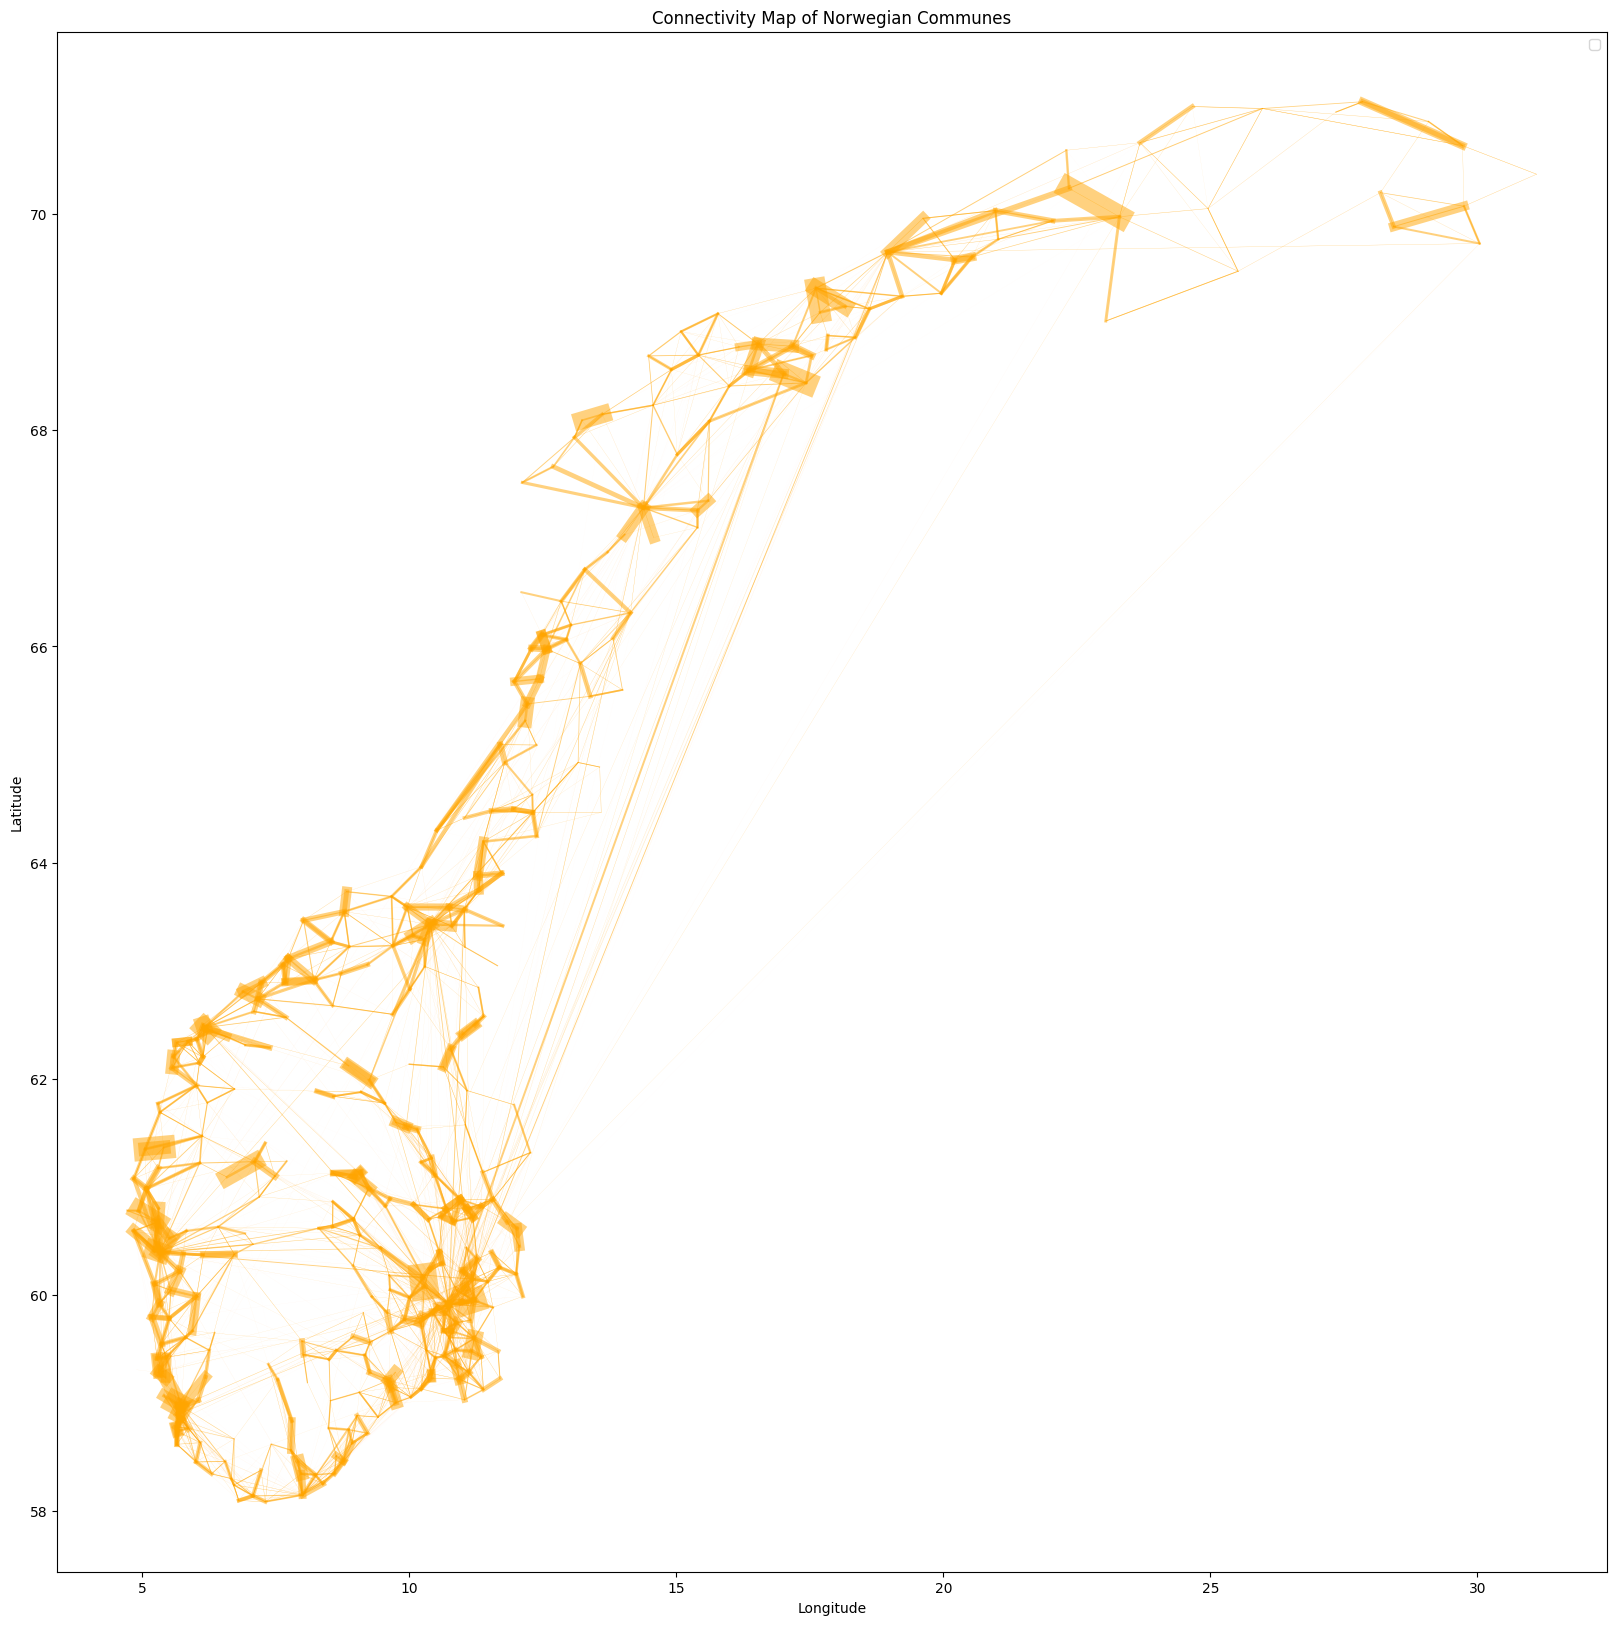

In [16]:
# Schritt 2: Füge die Verbindungen mit Farbskala hinzu
fig, ax = plt.subplots(figsize=(20, 20))
n_nodes = len(gdf)
for i in range(n_nodes):
    for j in range(n_nodes):
        if conn_matrix[i, j] > 0:  # Überprüfen, ob es eine Verbindung gibt
            line = LineString([gdf.geometry[i], gdf.geometry[j]])
            # Dicke der Linie basierend auf dem Verbindungswert
            line_width = conn_matrix[i, j] * 100  # Beispiel: Maximal 10
            plt.plot(*line.xy, color='orange', alpha=0.5, linewidth=line_width)

# Schritt 8: Diagramm anpassen
plt.title('Connectivity Map of Norwegian Communes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

CONN2RES FRAMEWORK

In [29]:
# Clone the conn2res repository
!git clone https://github.com/netneurolab/conn2res.git

# Move to directory
%cd conn2res

c:\Users\49171\Desktop\Master\Semester 3\Job\First Data - 10 CSV\conn2res


fatal: destination path 'conn2res' already exists and is not an empty directory.


In [30]:
%pip install . --no-deps

Processing c:\users\49171\desktop\master\semester 3\job\first data - 10 csv\conn2res
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for conn2res: filename=conn2res-1.0.0a0+37.gb5c887f.dirty-py3-none-any.whl size=38679 sha256=36c3ba841ac5218df7ab264560184efa9626ec40d9510988a8209aed5918ab93
  Stored in directory: C:\Users\49171\AppData\Local\Temp\pip-ephem-wheel-cache-8126o482\wheels\49\08\1e\f0eeb673ced4739b2407e792c6fc9037a4fd127522339646ae
Successfully built conn2res
  Attempting uninstall: conn2res
    Found existing installation: conn2res 1.0.0a0+37.gb5c887f.dirty
    Uninstalling conn2res-1.0.0a0+37.gb5c887f.dirty:
      Successfully uninstalled conn2res-1.0.0a0+37.gb5c887f.dirty
Note: you may need to rest

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [31]:
%pip install neurogym
import neurogym

In [32]:
%pip install reservoirpy bctpy

import reservoirpy
import conn2res

Note: you may need to restart the kernel to use updated packages.


In [71]:
%matplotlib inline

import warnings
import os
import numpy as np
import pandas as pd
from sklearn.base import is_classifier
from conn2res.tasks import Conn2ResTask
from conn2res.tasks import NeuroGymTask
from conn2res.connectivity import Conn
from conn2res.reservoir import EchoStateNetwork
from conn2res.readout import Readout
from conn2res import readout, plotting

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [72]:
# name of the tasks to be performed
TASK = 'PerceptualDecisionMaking'

# define metrics to evaluate readout's model performance
METRICS = [
    'balanced_accuracy_score',
    'f1_score',
    'filtered_accuracy',
    'filtered_accuracy_score',
]

# define alpha values to vary global reservoir dynamics
ALPHAS = np.linspace(0, 2, 11)[1:]

# activation function defines local dynamics
ACT_FCN = 'tanh'  # 'sigmoid'

Second, let's fetch a NeuroGym task data set.

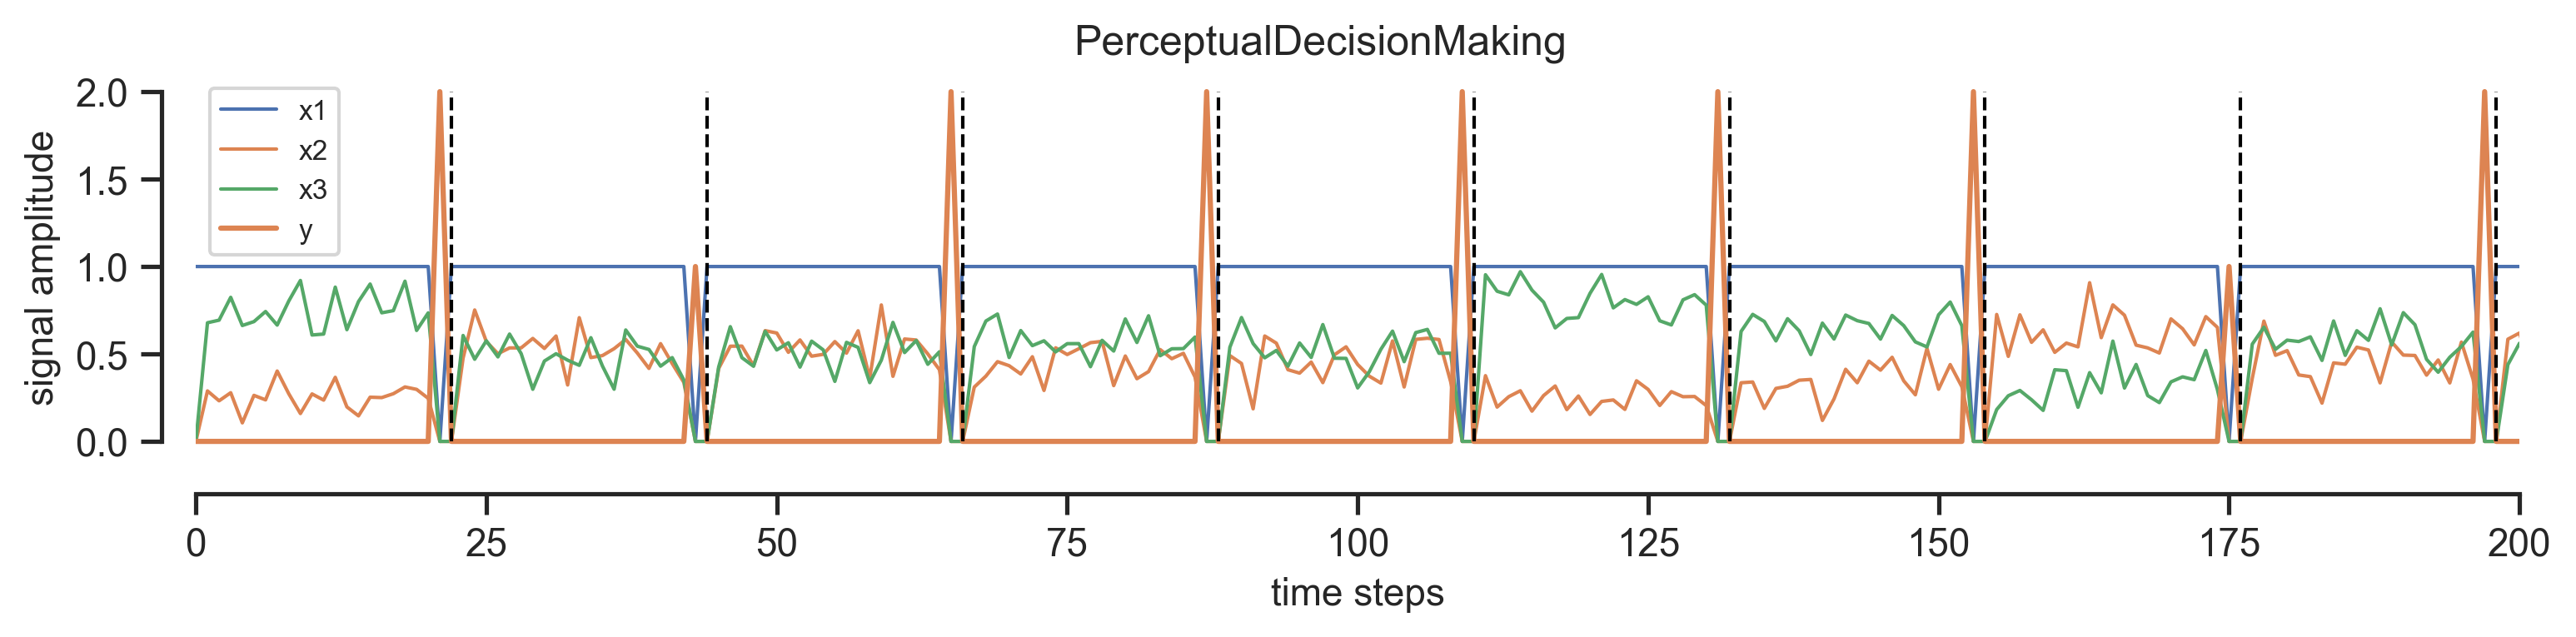

In [73]:
# instantiate task object
task = NeuroGymTask(name=TASK)

# amount of multiplications
n_repeats = 1

# fetch input/output data to perform task
x, y = task.fetch_data(n_trials=1000, input_gain=1)
x = [np.concatenate([i] * n_repeats, axis=1) for i in x]

# plot input/output (x/y) data
plotting.plot_iodata(
    x, y, title=task.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True
)

# split data into training and test sets
x_train, x_test, y_train, y_test = readout.train_test_split(x, y)

In [74]:
"""# instantiate task object
task_2 = NeuroGymTask(name=TASK_2)

# amount of multiplications
# n_repeats = 1

# fetch input/output data to perform task
x, y = task_2.fetch_data(n_trials=1000, input_gain=1)
# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]

# plot input/output (x/y) data
plotting.plot_iodata(
    x, y, title=task_2.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True
)

# split data into training and test sets
x_train, x_test, y_train, y_test = readout.train_test_split(x, y)"""

"# instantiate task object\ntask_2 = NeuroGymTask(name=TASK_2)\n\n# amount of multiplications\n# n_repeats = 1\n\n# fetch input/output data to perform task\nx, y = task_2.fetch_data(n_trials=1000, input_gain=1)\n# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]\n\n# plot input/output (x/y) data\nplotting.plot_iodata(\n    x, y, title=task_2.name,\n    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},\n    show=True\n)\n\n# split data into training and test sets\nx_train, x_test, y_train, y_test = readout.train_test_split(x, y)"

In [75]:
"""# instantiate task object
task_3 = Conn2ResTask(name=TASK_3)

# amount of multiplications
# n_repeats = 1

# fetch input/output data to perform task
x, y = task_3.fetch_data(n_trials=1000, input_gain=1)
# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]

# plot input/output (x/y) data
plotting.plot_iodata(
    x, y, title=task_3.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True
)

# split data into training and test sets
x_train, x_test, y_train, y_test = readout.train_test_split(x, y)"""

"# instantiate task object\ntask_3 = Conn2ResTask(name=TASK_3)\n\n# amount of multiplications\n# n_repeats = 1\n\n# fetch input/output data to perform task\nx, y = task_3.fetch_data(n_trials=1000, input_gain=1)\n# x = [np.concatenate([i] * n_repeats, axis=1) for i in x]\n\n# plot input/output (x/y) data\nplotting.plot_iodata(\n    x, y, title=task_3.name,\n    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},\n    show=True\n)\n\n# split data into training and test sets\nx_train, x_test, y_train, y_test = readout.train_test_split(x, y)"

Third, let's import the connectivity matrix we are going to use to define the connections of the reservoir.  

For this we will be using the human connectome parcellated into 1015 brain regions following the Desikan Killiany atlas (Desikan, et al., 2006).

In [76]:
# Pfad zu 'connectivity.npy'-Datei in Google Drive
filename = 'content/connectivity_matrix/connectivity_matrix.npy'

# Erstelle das Conn-Objekt und lade die Konnektivitätsdaten aus dem angegebenen Pfad
conn = Conn(filename=filename)

Let's define the set of input and output nodes.

To do so, we will use functional intrinsic networks (Yeo ,et al., 2011).

In [77]:
"""# Define input and output nodes
n_input_nodes = 50  # 50 as input nodes
n_output_nodes = 50  # 50 as output nodes

# Select random input nodes
input_nodes = conn.get_nodes('random', n_nodes=n_input_nodes)  # Zufällige Eingabeknoten

# Ensure output nodes are different from input nodes
all_nodes = set(range(conn.n_nodes))  # Assuming conn.n_nodes gives the total number of nodes
available_nodes = list(all_nodes - set(input_nodes))  # Exclude input nodes from the pool

# Select random output nodes from the remaining nodes
output_nodes = np.random.choice(available_nodes, n_output_nodes, replace=False)  # Zufällige Ausgabeknoten

print("Anzahl der Input Nodes:", len(input_nodes))
print("Anzahl der Output Nodes:", len(output_nodes))"""

'# Define input and output nodes\nn_input_nodes = 50  # 50 as input nodes\nn_output_nodes = 50  # 50 as output nodes\n\n# Select random input nodes\ninput_nodes = conn.get_nodes(\'random\', n_nodes=n_input_nodes)  # Zufällige Eingabeknoten\n\n# Ensure output nodes are different from input nodes\nall_nodes = set(range(conn.n_nodes))  # Assuming conn.n_nodes gives the total number of nodes\navailable_nodes = list(all_nodes - set(input_nodes))  # Exclude input nodes from the pool\n\n# Select random output nodes from the remaining nodes\noutput_nodes = np.random.choice(available_nodes, n_output_nodes, replace=False)  # Zufällige Ausgabeknoten\n\nprint("Anzahl der Input Nodes:", len(input_nodes))\nprint("Anzahl der Output Nodes:", len(output_nodes))'

In [78]:


"""For RANDOM node-selection"""




num_features = 3  # Number of input signals
num_nodes_per_input = 1  # Number of nodes each input signal should be passed to

# Define input and output nodes
n_input_nodes = num_features * num_nodes_per_input  # Total input nodes
n_output_nodes = 6  # Example number of output nodes

# Select random input nodes
input_nodes = conn.get_nodes('random', n_nodes=n_input_nodes)  # Random input nodes

# Ensure output nodes are different from input nodes
all_nodes = set(range(conn.n_nodes))  # Assuming conn.n_nodes gives the total number of nodes
available_nodes = list(all_nodes - set(input_nodes))  # Exclude input nodes from the pool

# Select random output nodes from the remaining nodes
output_nodes = np.random.choice(available_nodes, n_output_nodes, replace=False)  # Random output nodes

# Initialize w_in
w_in = np.zeros((num_features, conn.n_nodes))

# Map each input signal to multiple nodes
for i in range(num_features):
    for j in range(num_nodes_per_input):
        w_in[i, input_nodes[i * num_nodes_per_input + j]] = 1
       

In [92]:
"""

For INFORMED node-selection

"""


import numpy as np

num_features = 3  # Number of input signals
num_nodes_per_input = 1  # Number of nodes each input signal should be passed to

# Berechne den Out-Degree und In-Degree für jeden Knoten
out_degree = np.sum(conn_matrix, axis=1)  # Zeilensummen (Out-Degree)
in_degree = np.sum(conn_matrix, axis=0)   # Spaltensummen (In-Degree)

# Wähle die Knoten mit den höchsten Out-Degree-Werten für Input-Nodes
n_input_nodes = num_features * num_nodes_per_input  # Total input nodes
input_nodes = np.argsort(out_degree)[-n_input_nodes:]  # Top-n Knoten mit den höchsten Out-Degree-Werten

# Stelle sicher, dass Output-Nodes keine Input-Nodes sind
all_nodes = set(range(conn.n_nodes))
available_nodes = list(all_nodes - set(input_nodes))  # Exclude input nodes from the pool

# Wähle die Knoten mit den höchsten In-Degree-Werten für Output-Nodes aus den verbleibenden Knoten
n_output_nodes = 6  # Beispielhafte Anzahl von Output-Nodes
remaining_in_degrees = in_degree[available_nodes]  # Berechne In-Degree nur für verbleibende Knoten
sorted_remaining_nodes = np.argsort(remaining_in_degrees)  # Sortiere die verbleibenden Knoten nach In-Degree
output_nodes = np.array(available_nodes)[sorted_remaining_nodes[-n_output_nodes:]]  # Wähle Top-n Output-Nodes

# Initialisiere w_in
w_in = np.zeros((num_features, conn.n_nodes))

# Weise jedem Input-Signal mehrere Nodes zu
for i in range(num_features):
    for j in range(num_nodes_per_input):
        w_in[i, input_nodes[i * num_nodes_per_input + j]] = 1

# Zeige die gewählten Input- und Output-Nodes an
print("Gewählte Input Nodes (hoher Out-Degree):", input_nodes)
print("Gewählte Output Nodes (hoher In-Degree):", output_nodes)


Gewählte Input Nodes (hoher Out-Degree): [279 236   0]
Gewählte Output Nodes (hoher In-Degree): [ 94 112 317   2 111 214]


In [93]:
task.n_features = len(input_nodes)  # Setze n_features auf die Anzahl der gewählten Knoten

In [94]:
# 1. Anzahl der Eingabeknoten festlegen
n_input_nodes = len(input_nodes)  # Anzahl der spezifischen Knoten, die du ausgewählt hast

# 2. Erstelle w_in mit der korrekten Form
w_in = np.zeros((task.n_features, conn.n_nodes))  # (n_features, n_nodes)

# 3. Setze die Identitätsmatrix in w_in
# Hier stellen wir sicher, dass die Form von np.eye() korrekt ist
if n_input_nodes == task.n_features:
    w_in[:, input_nodes] = np.eye(task.n_features)  # Hier passen die Dimensionen
else:
    raise ValueError("Die Anzahl der Input-Nodes muss gleich der Anzahl der task.n_features sein.")


Now we will create the input connectivity matrix to define the connections between the input layer (source nodes where the input signal is coming from) and the input nodes in the reservoir.

In [95]:
w_in = np.zeros((task.n_features, conn.n_nodes))
w_in[:, input_nodes] = np.eye(task.n_features)

In [96]:
print("Anzahl der Input Nodes:", len(input_nodes))
print("Anzahl der task.n_features:", task.n_features)
print("Anzahl der Output Nodes:", len(output_nodes))

Anzahl der Input Nodes: 3
Anzahl der task.n_features: 3
Anzahl der Output Nodes: 6


Next, we will simulate the dynamics of the reservoir. We will evaluate the effect of local network dynamics by using different activation functions. We will also evaluate network performance across dynamical regimes by parametrically tuning alpha, which corresponds to the spectral radius of the connectivity matrix (alpha parameter).

In [97]:
# instantiate an Echo State Network object
esn = EchoStateNetwork(w=conn.w, activation_function=ACT_FCN)

# instantiate a Readout module object
readout_module = Readout(estimator=readout.select_model(y))

In [98]:
"""# 1. Definiere die Anzahl der Eingabeknoten (hier wird auf 3 gesetzt, um mit task.n_features übereinzustimmen)
input_nodes = input_nodes[:task.n_features]  # Wähle die ersten 3 Knoten

# 2. Erstelle w_in mit der korrekten Form
w_in = np.zeros((task.n_features, conn.n_nodes))  # (3, 356)

# 3. Setze die Identitätsmatrix in w_in
w_in[:, input_nodes] = np.eye(task.n_features)"""

'# 1. Definiere die Anzahl der Eingabeknoten (hier wird auf 3 gesetzt, um mit task.n_features übereinzustimmen)\ninput_nodes = input_nodes[:task.n_features]  # Wähle die ersten 3 Knoten\n\n# 2. Erstelle w_in mit der korrekten Form\nw_in = np.zeros((task.n_features, conn.n_nodes))  # (3, 356)\n\n# 3. Setze die Identitätsmatrix in w_in\nw_in[:, input_nodes] = np.eye(task.n_features)'

In [99]:
"""num_features = 3  # Definiere die Anzahl der Merkmale

# Wähle nur die ersten 3 Input Nodes aus
if len(input_nodes) > num_features:
    input_nodes = input_nodes[:num_features]  # Behalte nur die ersten 3 Knoten

# w_in korrekt definieren
w_in = np.zeros((num_features, conn.n_nodes))  
w_in[:, input_nodes] = np.eye(num_features)[:, :len(input_nodes)]"""

'num_features = 3  # Definiere die Anzahl der Merkmale\n\n# Wähle nur die ersten 3 Input Nodes aus\nif len(input_nodes) > num_features:\n    input_nodes = input_nodes[:num_features]  # Behalte nur die ersten 3 Knoten\n\n# w_in korrekt definieren\nw_in = np.zeros((num_features, conn.n_nodes))  \nw_in[:, input_nodes] = np.eye(num_features)[:, :len(input_nodes)]'

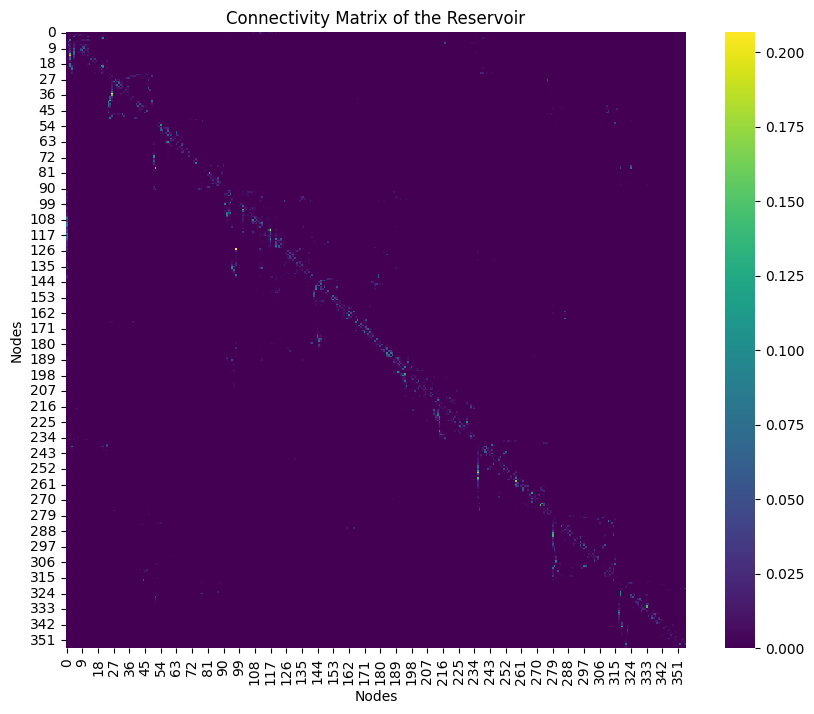

In [100]:
import seaborn as sns

# Assuming conn.w is your connectivity matrix
connectivity_matrix = conn.w

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(connectivity_matrix, cmap='viridis', cbar=True)
plt.title('Connectivity Matrix of the Reservoir')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.show()

Finally, let's visualize task performance.

In [101]:
print(input_nodes)
print(output_nodes)

[279 236   0]
[ 94 112 317   2 111 214]


In [102]:
# Drucke die Namen der ausgewählten Input- und Output-Nodes
print("Input Nodes:", kommune_lat_lon.loc[input_nodes, 'name'].values)
print("Output Nodes:", kommune_lat_lon.loc[output_nodes, 'name'].values)

Input Nodes: ['Trondheim' 'Bergen' 'Oslo']
Output Nodes: ['Fredrikstad' 'Asker' 'Tromsø' 'Stavanger' 'Bærum' 'Kristiansand']


In [103]:
print(f"w_in shape: {w_in.shape}")
print(f"connectivity_matrix shape: {connectivity_matrix.shape}")
print(f"output_nodes: {output_nodes}")
print("x_test shape:", x_test[0].shape)
print("x_train shape:", x_train[0].shape)
print("Number of non-zero elements in connectivity_matrix:", np.count_nonzero(connectivity_matrix))

w_in shape: (3, 356)
connectivity_matrix shape: (356, 356)
output_nodes: [ 94 112 317   2 111 214]
x_test shape: (22, 3)
x_train shape: (22, 3)
Number of non-zero elements in connectivity_matrix: 8893


In [92]:
# Initialize an empty list to collect results for different alpha values
df_alpha = []

# Iterate over specified alpha values in ALPHAS
for alpha in ALPHAS:
    print(f'\n\t\t\t----- alpha = {np.round(alpha, 2)} -----')

    # Scale connectivity matrix by alpha
    esn.w = alpha * conn.w

    # Simulate reservoir states for training and testing datasets
    rs_train = esn.simulate(ext_input=x_train, w_in=w_in, output_nodes=output_nodes)
    rs_test = esn.simulate(ext_input=x_test, w_in=w_in, output_nodes=output_nodes)

    # Generate diagnostic plots if alpha equals 1.0
    if alpha == 1.0:
        # Plot reservoir states for training data
        plotting.plot_reservoir_states(
            x=x_train, reservoir_states=rs_train,
            title=f'{task.name} - training',
            rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
            show=True
        )

        # Diagnostic plots for training
        plotting.plot_diagnostics(
            x=x_train, y=y_train, reservoir_states=rs_train,
            trained_model=readout_module.model, title=f'{task.name} - training diagnostics',
            rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
            show=True
        )

        # Diagnostic plots for testing
        plotting.plot_diagnostics(
            x=x_test, y=y_test, reservoir_states=rs_test,
            trained_model=readout_module.model, title=f'{task.name} - test diagnostics',
            rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
            show=True
        )

    # Run the task on the model and get performance results
    df_res = readout_module.run_task(
        X=(rs_train, rs_test), y=(y_train, y_test),
        sample_weight='both', metric=METRICS,
        readout_modules=None, readout_nodes=None,
    )

    # Add alpha value to the result
    df_res['alpha'] = np.round(alpha, 3)

    # Append this result to the list of all alpha results
    df_alpha.append(df_res)

# Concatenate all collected results into a single DataFrame
df_alpha = pd.concat(df_alpha, ignore_index=True)




			----- alpha = 0.2 -----


ValueError: shapes (0,) and (3,356) not aligned: 0 (dim 0) != 3 (dim 0)

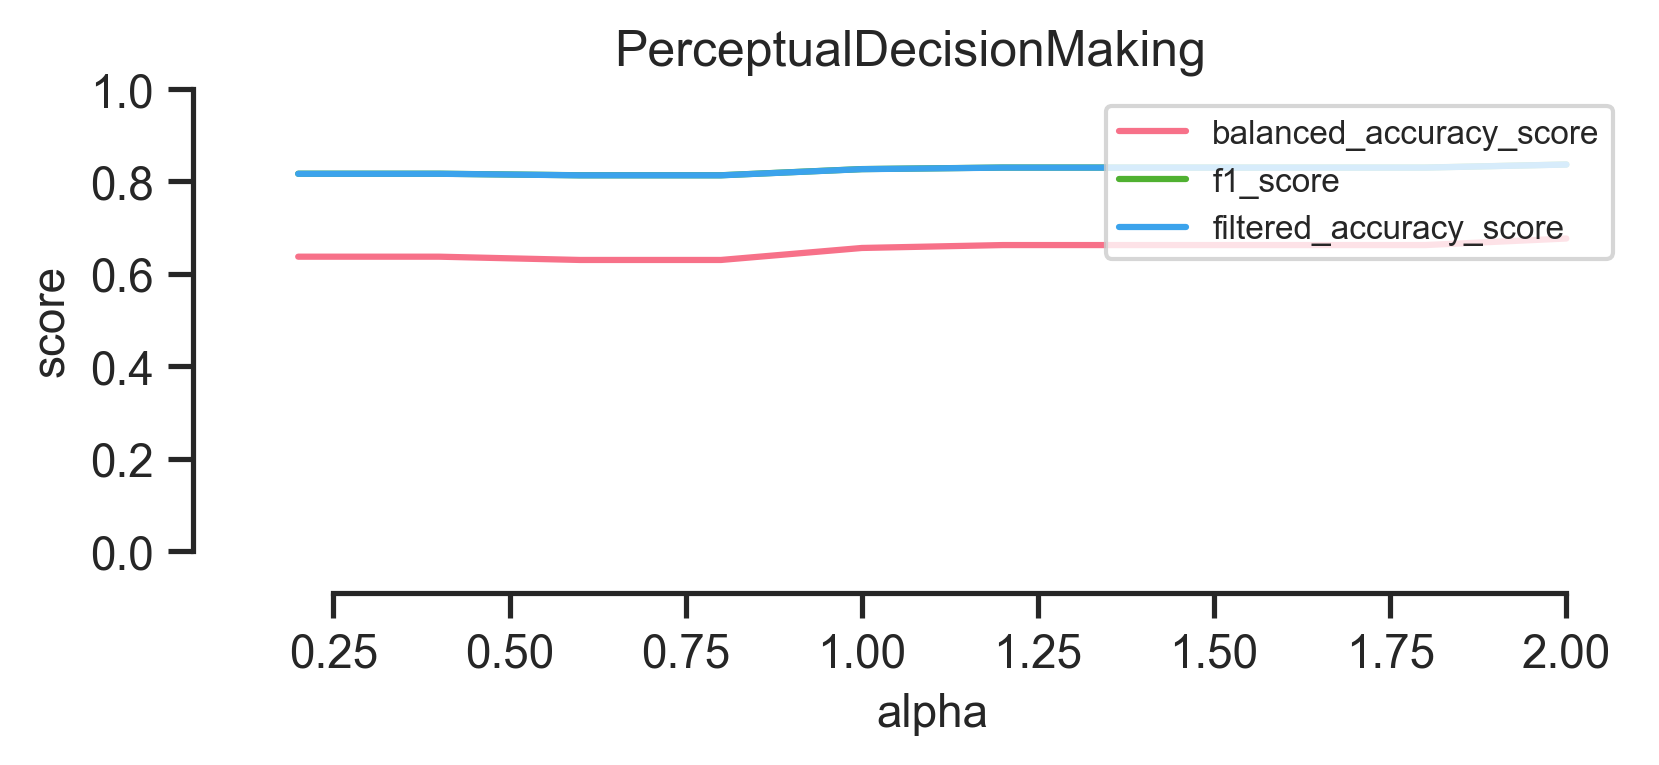

In [42]:
# Visualize performance, including the new signal detection accuracy
df_melt = pd.melt(
    df_alpha,
    id_vars=['alpha'],
    value_vars=['balanced_accuracy_score', 'f1_score', "filtered_accuracy_score"],
    var_name='metric',
    value_name='score'
)

# Plot performance for all metrics
plotting.plot_performance(
    df_melt,
    x='alpha',
    y='score',
    hue='metric',
    title=task.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True,  # This should display the plot
    ax_params={'ylim': (0, 1)}  # Add y-axis limits directly to the `ax_params`
)

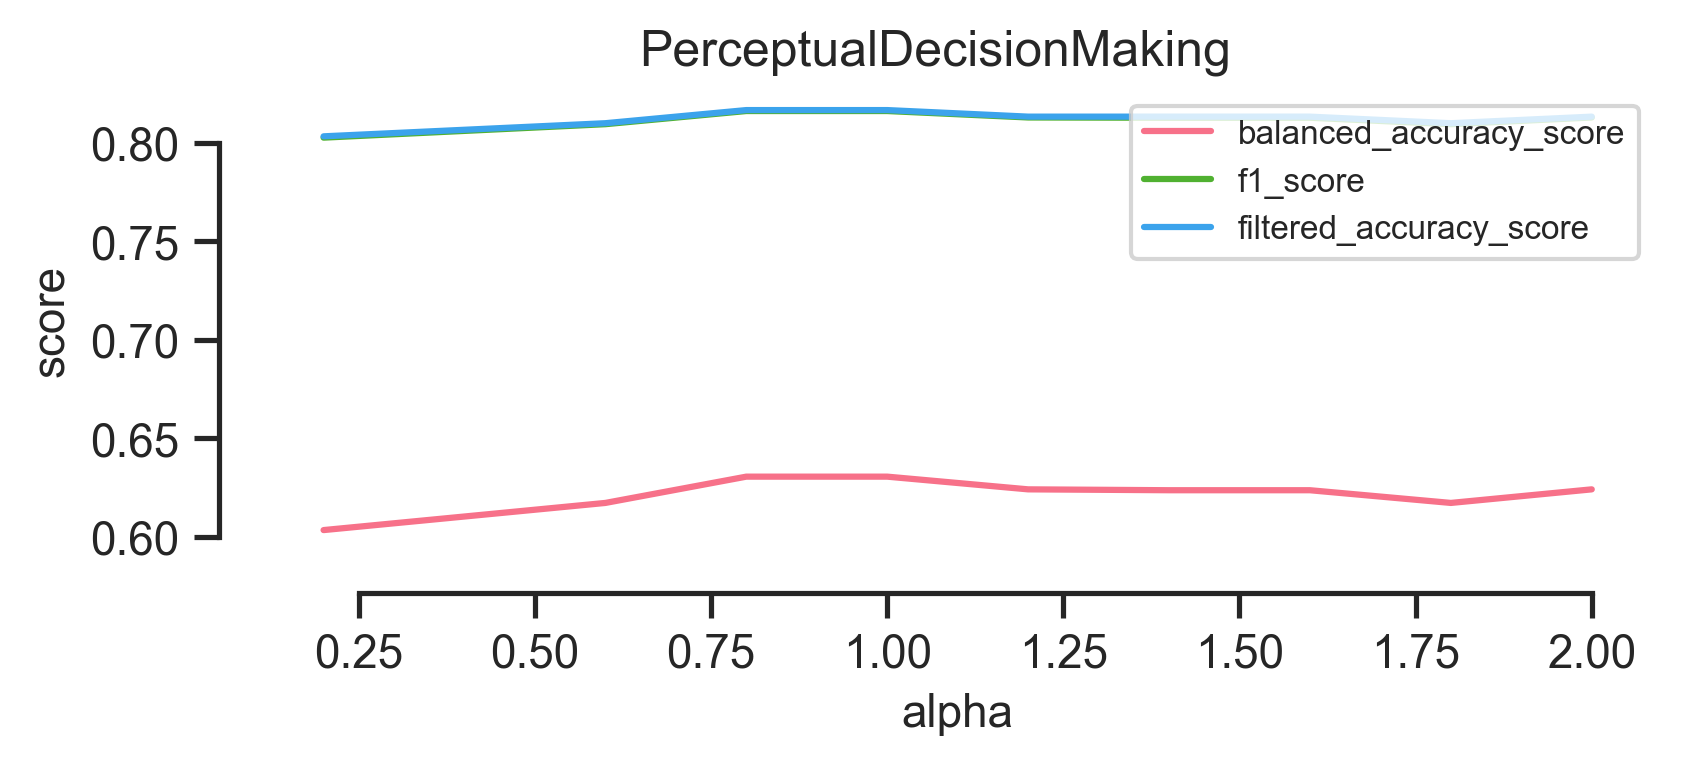

In [44]:
# Visualize performance, including the new signal detection accuracy
df_melt = pd.melt(df_alpha,
                  id_vars=['alpha'],
                  value_vars=['balanced_accuracy_score', 'f1_score', "filtered_accuracy_score"],
                  var_name='metric',
                  value_name='score'
                 )

# Plot performance for all metrics including signal detection accuracy
plotting.plot_performance(
    df_melt,
    x='alpha', y='score',
    hue='metric',
    title=task.name,
    rc_params={'figure.dpi': 300, 'savefig.dpi': 300},
    show=True
)

DIFFICULTY

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import neurogym as ngym
from conn2res import plotting

# Number of iterations
iterations = 2  # Define the number of iterations to run

# Directory for saving results
output_dir = './reservoir_results/PerceptualDecisionMaking/results/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of input repetitions
n_repeats = 1  # Define the number of repetitions for the input nodes

# Initialize summary data list for each difficulty level
summary_data = []

# Define difficulty levels with coherence and noise values
difficulty_levels = {
    #'easy': {'cohs': [0.8, 1.0], 'sigma': 0.5},
    'medium': {'cohs': [0.4, 0.6], 'sigma': 1.0},
    #'hard': {'cohs': [0.1, 0.3], 'sigma': 1.5},
}

# Initialize a dictionary to aggregate metrics across all iterations for each alpha and difficulty level
alpha_metrics = {alpha: {'accuracy': [], 'f1_score': [], 'filtered_accuracy_score': []} for alpha in ALPHAS}

# Loop over difficulty levels
for difficulty, params in difficulty_levels.items():
    print(f"\nRunning task for difficulty: {difficulty}")
    
    # Initialize environment for each difficulty
    env = ngym.make('PerceptualDecisionMaking-v0', cohs=params['cohs'], sigma=params['sigma'])

    # Fetch input/output data for this difficulty
    x, y = task.fetch_data(n_trials=1000, input_gain=1)
    
    # Dynamically repeat the input nodes based on n_repeats
    x = [np.concatenate([i] * n_repeats, axis=1) for i in x]

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = readout.train_test_split(x, y)

    # Loop over iterations with a progress bar for each difficulty
    for iteration in tqdm(range(1, iterations + 1), desc=f"Running iterations for {difficulty}"):

        # Randomly select input and output nodes for this iteration
        num_features = 3  # Number of input signals
        num_nodes_per_input = 1  # Nodes per input signal
        n_input_nodes = num_features * num_nodes_per_input  # Total input nodes
        n_output_nodes = 6  # Number of output nodes

        # Random Node Selection
        input_nodes = conn.get_nodes('random', n_nodes=n_input_nodes)
        all_nodes = set(range(conn.n_nodes))
        available_nodes = list(all_nodes - set(input_nodes))
        output_nodes = np.random.choice(available_nodes, n_output_nodes, replace=False)

        # Initialize w_in matrix
        w_in = np.zeros((num_features, conn.n_nodes))
        for i in range(num_features):
            for j in range(num_nodes_per_input):
                w_in[i, input_nodes[i * num_nodes_per_input + j]] = 1

        # Prepare to store performance results for each alpha value
        df_alpha = []
        
        # Iterate over different alpha values
        for alpha in ALPHAS:

            # Scale connectivity matrix by alpha
            esn.w = alpha * conn.w
            
            # Simulate reservoir states (training and testing)
            rs_train = esn.simulate(ext_input=x_train, w_in=w_in, output_nodes=output_nodes)
            rs_test = esn.simulate(ext_input=x_test, w_in=w_in, output_nodes=output_nodes)

            # Run the task using the readout module and record the metrics
            df_res = readout_module.run_task(
                X=(rs_train, rs_test), 
                y=(y_train, y_test),
                sample_weight='both', 
                metric=METRICS,  # Includes f1_score and filtered_accuracy
                readout_modules=None, 
                readout_nodes=None
            )

            # Add alpha and difficulty level to df_res and append to df_alpha
            df_res['alpha'] = np.round(alpha, 3)
            df_res['difficulty'] = difficulty
            df_alpha.append(df_res)

            # Aggregate metrics for each alpha and difficulty level
            alpha_metrics[alpha]['accuracy'].append(df_res['balanced_accuracy_score'].mean())
            alpha_metrics[alpha]['f1_score'].append(df_res['f1_score'].mean())
            alpha_metrics[alpha]['filtered_accuracy_score'].append(df_res['filtered_accuracy_score'].mean())

        # Concatenate and save results for this difficulty level and iteration
        df_alpha = pd.concat(df_alpha, ignore_index=True)

        # Save summary data for this iteration and difficulty level
        summary_data.append({
            'Iteration': iteration,
            'Difficulty': difficulty,
            'InputNodes': str(input_nodes),  # Save the specific input nodes used
            'OutputNodes': str(output_nodes),  # Save the specific output nodes used
            'MeanAccuracy': np.mean([alpha_metrics[difficulty][alpha]['accuracy'][-1] for alpha in ALPHAS]),
            'MeanF1Score': np.mean([alpha_metrics[difficulty][alpha]['f1_score'][-1] for alpha in ALPHAS]),
            'MeanFilteredAccuracy': np.mean([alpha_metrics[difficulty][alpha]['filtered_accuracy_score'][-1] for alpha in ALPHAS]),
            'StdDevAccuracy': np.std([alpha_metrics[difficulty][alpha]['accuracy'][-1] for alpha in ALPHAS]),
            'StdDevF1Score': np.std([alpha_metrics[difficulty][alpha]['f1_score'][-1] for alpha in ALPHAS]),
            'StdDevFilteredAccuracy': np.std([alpha_metrics[difficulty][alpha]['filtered_accuracy_score'][-1] for alpha in ALPHAS])
        })

# Save all summary data to a CSV file for each difficulty level
summary_file = os.path.join(output_dir, 'Saturday1_PerceptualDecisionMaking_random.csv')
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(summary_file, index=False)

# Plot the aggregated results
plt.figure(figsize=(10, 8))

# Aggregate metrics for accuracy, F1 score, and filtered accuracy
aggregated_accuracy = [np.mean(alpha_metrics[alpha]['accuracy']) for alpha in ALPHAS]
aggregated_f1_score = [np.mean(alpha_metrics[alpha]['f1_score']) for alpha in ALPHAS]
aggregated_filtered_accuracy = [np.mean(alpha_metrics[alpha]['filtered_accuracy_score']) for alpha in ALPHAS]

# Calculate standard deviation across iterations
accuracy_std = [np.std(alpha_metrics[alpha]['accuracy']) for alpha in ALPHAS]
f1_score_std = [np.std(alpha_metrics[alpha]['f1_score']) for alpha in ALPHAS]
filtered_accuracy_std = [np.std(alpha_metrics[alpha]['filtered_accuracy_score']) for alpha in ALPHAS]

# Plot accuracy with error bars
plt.errorbar(ALPHAS, aggregated_accuracy, yerr=accuracy_std, label='Accuracy', marker='o', capsize=5, color='orange')
# Plot F1 score with error bars
plt.errorbar(ALPHAS, aggregated_f1_score, yerr=f1_score_std, label='F1 Score', marker='x', capsize=5, color='blue')
# Plot filtered accuracy with error bars
plt.errorbar(ALPHAS, aggregated_filtered_accuracy, yerr=filtered_accuracy_std, label='Filtered Accuracy', marker='s', capsize=5, color='green')

plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Aggregated Performance Metrics Across Alpha Values (Medium Difficulty)')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(output_dir, 'Saturday1_PerceptualDecisionMaking_random.png'), dpi=300)
plt.show()


Running task for difficulty: medium


Running iterations for medium:   0%|          | 0/2 [00:11<?, ?it/s]


KeyError: 'medium'

Running iterations: 100%|██████████| 100/100 [18:45<00:00, 11.26s/it]


Summary data saved to: ./reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/Saturday2_PerceptualDecisionMaking_informed.csv


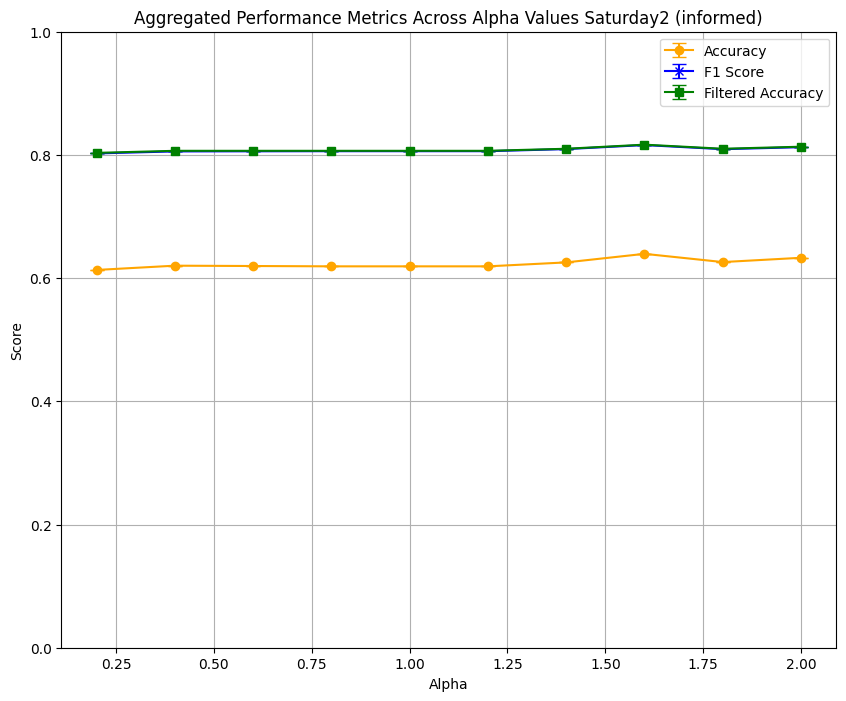

Plot saved to: ./reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/Saturday2_PerceptualDecisionMaking_informed.png


In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import neurogym as ngym
from conn2res import plotting

# Define ALPHAS and METRICS
ALPHAS = np.linspace(0.2, 2.0, 10)
METRICS = ['balanced_accuracy_score', 'f1_score', 'filtered_accuracy_score']

# Number of iterations
iterations = 100

# Directory for saving results
output_dir = './reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Number of input repetitions
n_repeats = 1  # Define the number of repetitions for the input nodes

# Initialize alpha_metrics
alpha_metrics = {alpha: {'accuracy': [], 'f1_score': [], 'filtered_accuracy_score': []} for alpha in ALPHAS}

# Summary data storage
summary_data = []

# Initialize environment for medium difficulty
env = ngym.make('PerceptualDecisionMaking-v0', cohs=[0.4, 0.6], sigma=1.0)

# Fetch input/output data for medium difficulty
x, y = task.fetch_data(n_trials=1000, input_gain=1)
x = [np.concatenate([i] * n_repeats, axis=1) for i in x]
x_train, x_test, y_train, y_test = readout.train_test_split(x, y)

# Loop over iterations
for iteration in tqdm(range(1, iterations + 1), desc="Running iterations"):

    """# Select random input and output nodes for each iteration
    input_nodes = conn.get_nodes('random', n_nodes=3)
    output_nodes = np.random.choice(
        list(set(range(conn.n_nodes)) - set(input_nodes)), 6, replace=False
    )"""

    # Initialize w_in matrix
    w_in = np.zeros((len(input_nodes), conn.n_nodes))
    for i, node in enumerate(input_nodes):
        w_in[i, node] = 1

    # Iterate over different alpha values
    for alpha in ALPHAS:
        # Scale connectivity matrix by alpha
        esn.w = alpha * conn.w

        # Simulate reservoir states (training and testing)
        rs_train = esn.simulate(ext_input=x_train, w_in=w_in, output_nodes=output_nodes)
        rs_test = esn.simulate(ext_input=x_test, w_in=w_in, output_nodes=output_nodes)

        # Run the task using the readout module and record the metrics
        df_res = readout_module.run_task(
            X=(rs_train, rs_test),
            y=(y_train, y_test),
            sample_weight='both',
            metric=METRICS,
        )

        # Aggregate metrics
        alpha_metrics[alpha]['accuracy'].append(df_res['balanced_accuracy_score'].mean())
        alpha_metrics[alpha]['f1_score'].append(df_res['f1_score'].mean())
        alpha_metrics[alpha]['filtered_accuracy_score'].append(df_res['filtered_accuracy_score'].mean())

        # Append to summary data
        summary_data.append({
            'Iteration': iteration,
            'Alpha': alpha,
            'Accuracy': df_res['balanced_accuracy_score'].mean(),
            'F1_Score': df_res['f1_score'].mean(),
            'Filtered_Accuracy': df_res['filtered_accuracy_score'].mean(),
            'InputNodes': str(input_nodes),  # Save Input Nodes
            'OutputNodes': str(output_nodes)  # Save Output Nodes
        })

# Save all summary data to a CSV file
summary_file = os.path.join(output_dir, 'Saturday2_PerceptualDecisionMaking_informed.csv')
summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(summary_file, index=False)
print(f"Summary data saved to: {summary_file}")

# Plot the aggregated results
plt.figure(figsize=(10, 8))

# Aggregate metrics for accuracy, F1 score, and filtered accuracy
aggregated_accuracy = [np.mean(alpha_metrics[alpha]['accuracy']) for alpha in ALPHAS]
aggregated_f1_score = [np.mean(alpha_metrics[alpha]['f1_score']) for alpha in ALPHAS]
aggregated_filtered_accuracy = [np.mean(alpha_metrics[alpha]['filtered_accuracy_score']) for alpha in ALPHAS]

# Calculate standard deviation across iterations
accuracy_std = [np.std(alpha_metrics[alpha]['accuracy']) for alpha in ALPHAS]
f1_score_std = [np.std(alpha_metrics[alpha]['f1_score']) for alpha in ALPHAS]
filtered_accuracy_std = [np.std(alpha_metrics[alpha]['filtered_accuracy_score']) for alpha in ALPHAS]

# Plot accuracy with error bars
plt.errorbar(ALPHAS, aggregated_accuracy, yerr=accuracy_std, label='Accuracy', marker='o', capsize=5, color='orange')
# Plot F1 score with error bars
plt.errorbar(ALPHAS, aggregated_f1_score, yerr=f1_score_std, label='F1 Score', marker='x', capsize=5, color='blue')
# Plot filtered accuracy with error bars
plt.errorbar(ALPHAS, aggregated_filtered_accuracy, yerr=filtered_accuracy_std, label='Filtered Accuracy', marker='s', capsize=5, color='green')

plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('Aggregated Performance Metrics Across Alpha Values Saturday2 (informed)')
plt.ylim(0, 1)  # Ensure consistent scaling of y-axis
plt.legend()
plt.grid(True)

# Save the plot
plot_file = os.path.join(output_dir, 'Saturday2_PerceptualDecisionMaking_informed.png')
plt.savefig(plot_file, dpi=300)
plt.show()
print(f"Plot saved to: {plot_file}")




RANDOMIZATION

In [106]:
def compare_randomized_performance_with_visualization(original_matrix, swaps=10, n_repeats=1, iterations=100, alpha_value=1.0):
    """
    Randomize the connectivity matrix and compare its performance with the original using a fixed alpha value.
    Visualize the performance metrics over iterations with a fixed y-axis scale from 0 to 1.

    Returns:
        summary_df (pd.DataFrame): DataFrame summarizing performance metrics.
        random_matrix (np.ndarray): The randomized connectivity matrix.
    """
    import copy
    from conn2res.connectivity import Conn
    from conn2res.utils import check_symmetric
    from bct.algorithms.reference import randmio_und_connected, randmio_dir_connected

    # Copy the original matrix for safety
    random_matrix = copy.deepcopy(original_matrix)
    
    # Check if the matrix is symmetric or directed
    if check_symmetric(original_matrix):
        random_matrix, _ = randmio_und_connected(random_matrix, swaps)
    else:
        random_matrix, _ = randmio_dir_connected(random_matrix, swaps)

    # Load both matrices into the Conn object
    original_conn = Conn(w=original_matrix)
    randomized_conn = Conn(w=random_matrix)

    # Initialize summary data
    summary_data = []

    # Initialize environment for medium difficulty
    env = ngym.make('PerceptualDecisionMaking-v0', cohs=[0.4, 0.6], sigma=1.0)

    # Fetch input/output data
    x, y = task.fetch_data(n_trials=1000, input_gain=1)

    # Repeat input data based on n_repeats
    x = [np.concatenate([i] * n_repeats, axis=1) for i in x]
    task.n_features = len(x[0][0])  # Set n_features to match the repeated input size

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = readout.train_test_split(x, y)
    
    # Iterate over specified iterations
    for iteration in tqdm(range(1, iterations + 1), desc="Running iterations"):
        
        # Set random input/output nodes for each iteration
        input_nodes = original_conn.get_nodes('random', n_nodes=task.n_features)
        all_nodes = set(range(original_conn.n_nodes))
        available_nodes = list(all_nodes - set(input_nodes))
        output_nodes = np.random.choice(available_nodes, 6, replace=False)
        
        # Initialize w_in
        w_in = np.zeros((task.n_features, original_conn.n_nodes))
        for i in range(task.n_features):
            w_in[i, input_nodes[i]] = 1

        # Initialize ESN objects
        original_esn = EchoStateNetwork(w=original_conn.w, activation_function=ACT_FCN)
        randomized_esn = EchoStateNetwork(w=randomized_conn.w, activation_function=ACT_FCN)

        # Prepare to store metrics
        iteration_data = {
            'iteration': iteration,
            'input_nodes': str(input_nodes),  # Store input nodes
            'output_nodes': str(output_nodes)  # Store output nodes
        }

        for matrix_type, esn, conn in [('original', original_esn, original_conn), ('randomized', randomized_esn, randomized_conn)]:
            # Scale the connectivity matrix by the fixed alpha value
            esn.w = alpha_value * conn.w

            # Simulate reservoir states
            rs_train = esn.simulate(ext_input=x_train, w_in=w_in, output_nodes=output_nodes)
            rs_test = esn.simulate(ext_input=x_test, w_in=w_in, output_nodes=output_nodes)

            # Run task
            df_res = readout_module.run_task(
                X=(rs_train, rs_test),
                y=(y_train, y_test),
                sample_weight='both',
                metric=METRICS
            )

            # Collect metrics
            iteration_data[f'{matrix_type}_accuracy'] = df_res['balanced_accuracy_score'].mean()
            iteration_data[f'{matrix_type}_f1_score'] = df_res['f1_score'].mean()
            iteration_data[f'{matrix_type}_filtered_accuracy'] = df_res['filtered_accuracy_score'].mean()

        # Append iteration data to summary
        summary_data.append(iteration_data)

    # Convert summary data to DataFrame
    summary_df = pd.DataFrame(summary_data)

    # Save summary
    summary_file = os.path.join(output_dir, 'randomized_vs_original_Saturday2_informed.csv')
    summary_df.to_csv(summary_file, index=False)
    print(f"\nSummary saved to {summary_file}")

    # Visualization
    metrics = ['original_accuracy', 'randomized_accuracy', 'original_f1_score', 'randomized_f1_score',
               'original_filtered_accuracy', 'randomized_filtered_accuracy']

    plt.figure(figsize=(14, 8))
    for metric in metrics:
        plt.plot(summary_df['iteration'], summary_df[metric], label=metric.replace('_', ' ').capitalize())

    plt.xlabel('Iteration')
    plt.ylabel('Score')
    plt.title('Performance Metrics Over Iterations')
    plt.legend()
    plt.ylim(0, 1)  # Set y-axis scale from 0 to 1
    plt.grid(True)

    # Save plot
    plot_file = os.path.join(output_dir, 'randomized_vs_original_Saturday2_informed.png')
    plt.savefig(plot_file, dpi=300)
    plt.show()
    print(f"Performance plot saved to: {plot_file}")

    return summary_df, random_matrix


Running iterations: 100%|██████████| 100/100 [03:42<00:00,  2.23s/it]



Summary saved to ./reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/randomized_vs_original_Saturday2_informed.csv


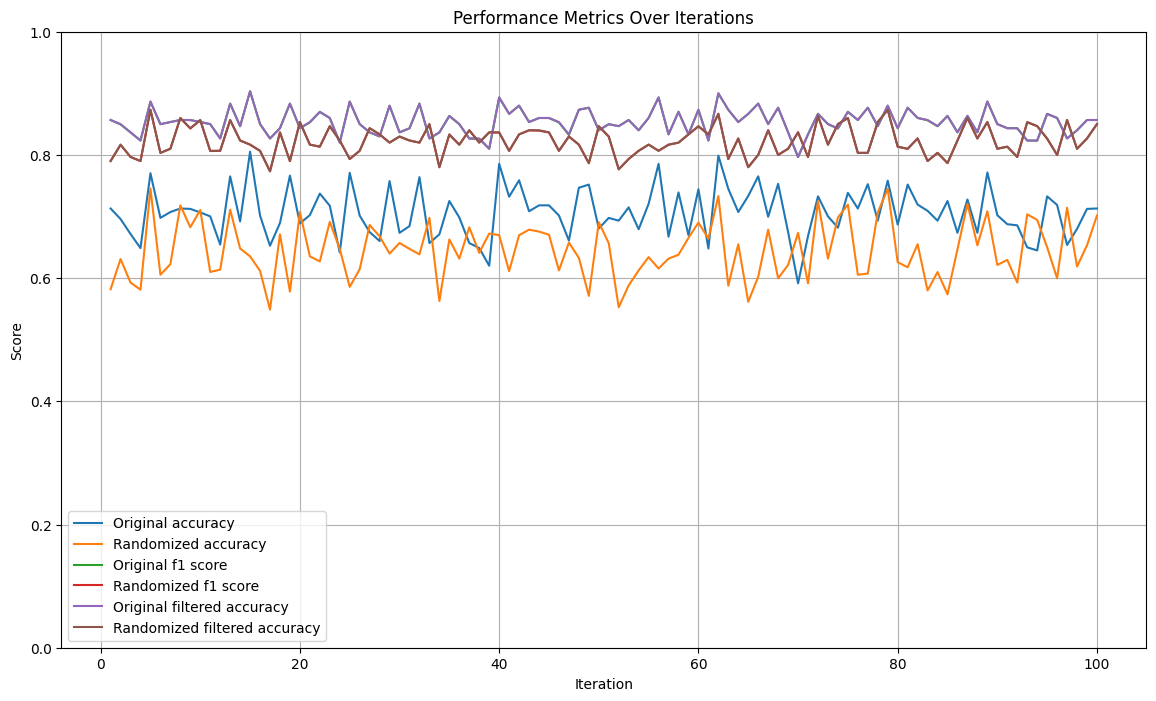

Performance plot saved to: ./reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/randomized_vs_original_Saturday2_informed.png


In [107]:
# Importieren Sie die Funktion mit Visualisierung
summary_df, random_matrix = compare_randomized_performance_with_visualization(
    original_matrix=conn.w, 
    iterations=100, 
    swaps=10, 
    alpha_value=1.625
)


In [57]:
compare_randomized_performance(original_matrix=conn.w, iterations=5, swaps=10)

Running iterations: 100%|██████████| 5/5 [00:11<00:00,  2.24s/it]


Summary saved to ./reservoir_results/PerceptualDecisionMaking/results/randomized_vs_original_Saturday1_informed.csv


(   iteration    input_nodes   output_nodes  original_accuracy  \
 0          1  [ 82 267 210]  [ 11 266 202]           0.570714   
 1          2  [144 184 316]  [282 350 175]           0.643952   
 2          3  [155 254 203]  [281 340 119]           0.575942   
 3          4  [253 276 332]  [143 189 277]           0.552393   
 4          5  [334 177 114]  [ 45 256  61]           0.530497   
 
    original_f1_score  original_filtered_accuracy  randomized_accuracy  \
 0           0.783615                    0.783333             0.646231   
 1           0.820240                    0.820000             0.328746   
 2           0.786952                    0.786667             0.593592   
 3           0.776809                    0.776667             0.632513   
 4           0.763641                    0.763333             0.583449   
 
    randomized_f1_score  randomized_filtered_accuracy  
 0             0.823446                      0.823333  
 1             0.666488                     

In [68]:
# Run the comparison and retrieve the random matrix
summary_df, random_matrix = compare_randomized_performance(original_matrix=conn.w, iterations=1, swaps=10)

# Visualize the matrices
# visualize_matrices(original_matrix=conn.w, randomized_matrix=random_matrix)


Running task for difficulty: easy


Running iterations for easy: 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]



Running task for difficulty: medium


Running iterations for medium: 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]



Running task for difficulty: hard


Running iterations for hard: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]


Summary saved to ./reservoir_results/random/randomized_vs_original_summary.csv


Original matrix saved to: ./reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/original_matrix.npy
Randomized matrix saved to: ./reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/randomized_matrix.npy
Original matrix visualization saved to: ./reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/original_matrix.jpg
Randomized matrix visualization saved to: ./reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/randomized_matrix.jpg


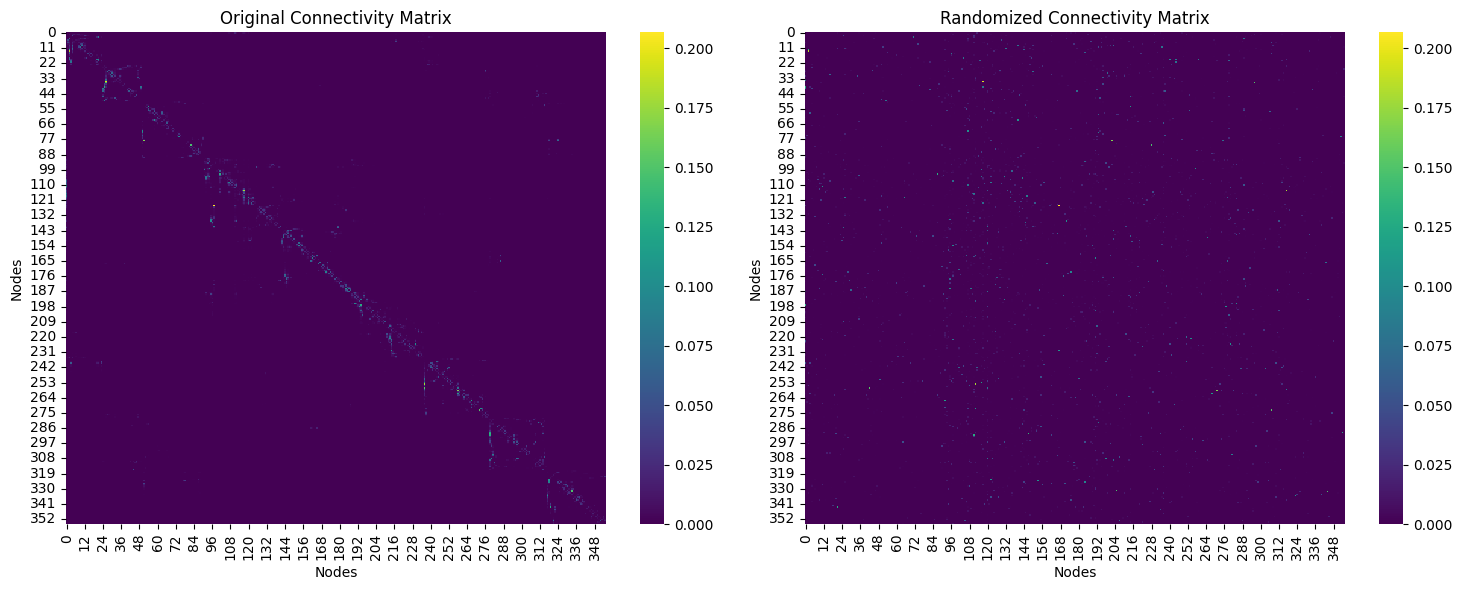

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

def visualize_and_save_matrices(original_matrix, randomized_matrix, output_dir="./reservoir_results/PerceptualDecisionMaking/results/Saturday2/informed/"):
    """
    Visualizes and compares the original and randomized connectivity matrices.
    Saves the matrices as .npy and .jpg files.

    Parameters:
        original_matrix (np.ndarray): The original connectivity matrix.
        randomized_matrix (np.ndarray): The randomized connectivity matrix.
        output_dir (str): Directory to save the matrices.
    """
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the matrices as .npy files
    original_matrix_file = os.path.join(output_dir, "original_matrix.npy")
    randomized_matrix_file = os.path.join(output_dir, "randomized_matrix.npy")
    np.save(original_matrix_file, original_matrix)
    np.save(randomized_matrix_file, randomized_matrix)
    print(f"Original matrix saved to: {original_matrix_file}")
    print(f"Randomized matrix saved to: {randomized_matrix_file}")

    # Save the matrices as .jpg files
    original_matrix_img_file = os.path.join(output_dir, "original_matrix.jpg")
    randomized_matrix_img_file = os.path.join(output_dir, "randomized_matrix.jpg")

    # Visualize and save the original matrix as a .jpg file
    plt.figure(figsize=(8, 6))
    sns.heatmap(original_matrix, cmap="viridis", cbar=True)
    plt.title("Original Connectivity Matrix")
    plt.xlabel("Nodes")
    plt.ylabel("Nodes")
    plt.tight_layout()
    plt.savefig(original_matrix_img_file, dpi=300, format='jpg')
    print(f"Original matrix visualization saved to: {original_matrix_img_file}")
    plt.close()

    # Visualize and save the randomized matrix as a .jpg file
    plt.figure(figsize=(8, 6))
    sns.heatmap(randomized_matrix, cmap="viridis", cbar=True)
    plt.title("Randomized Connectivity Matrix")
    plt.xlabel("Nodes")
    plt.ylabel("Nodes")
    plt.tight_layout()
    plt.savefig(randomized_matrix_img_file, dpi=300, format='jpg')
    print(f"Randomized matrix visualization saved to: {randomized_matrix_img_file}")
    plt.close()

    # Show the visualizations side by side (if desired)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Heatmap for the original matrix
    sns.heatmap(original_matrix, ax=axes[0], cmap="viridis", cbar=True)
    axes[0].set_title("Original Connectivity Matrix")
    axes[0].set_xlabel("Nodes")
    axes[0].set_ylabel("Nodes")

    # Heatmap for the randomized matrix
    sns.heatmap(randomized_matrix, ax=axes[1], cmap="viridis", cbar=True)
    axes[1].set_title("Randomized Connectivity Matrix")
    axes[1].set_xlabel("Nodes")
    axes[1].set_ylabel("Nodes")

    plt.tight_layout()
    plt.show()

# Call the function with your matrices
visualize_and_save_matrices(original_matrix=conn.w, randomized_matrix=random_matrix)



In [101]:
print("Number of non-zero elements in conn_matrix_normalized:", np.count_nonzero(conn.w))

Number of non-zero elements in conn_matrix_normalized: 8893


PERTUBATION

In [102]:
print("x_test shape:", x_test[0].shape)
print("x_train shape:", x_train[0].shape)
print("matrix shape:", conn.w.shape)
print("w_in shape:", w_in.shape)
print("random matrix shape:", random_matrix.shape)

x_test shape: (22, 3)
x_train shape: (22, 3)
matrix shape: (356, 356)
w_in shape: (3, 356)
random matrix shape: (356, 356)



			Iteration 1: Perturbing 3 Nodes
Nodes to remove: [296 306 155]
Iteration 1 - Dimensions of perturbed_matrix: (353, 353)
Iteration 1 - Number of non-zero elements in perturbed_matrix: 8753
Iteration 1 Results:
    balanced_accuracy_score  f1_score  filtered_accuracy_score  iteration  \
0                 0.667857  0.833489                 0.833333          1   

   perturbation perturbed_nodes  
0          True   [296 306 155]  

			Iteration 2: Perturbing 3 Nodes
Nodes to remove: [335 137 134]
Iteration 2 - Dimensions of perturbed_matrix: (350, 350)
Iteration 2 - Number of non-zero elements in perturbed_matrix: 8581
Iteration 2 Results:
    balanced_accuracy_score  f1_score  filtered_accuracy_score  iteration  \
0                 0.657919  0.827319                 0.826667          2   

   perturbation perturbed_nodes  
0          True   [335 137 134]  

			Iteration 3: Perturbing 3 Nodes
Nodes to remove: [ 58  41 281]
Iteration 3 - Dimensions of perturbed_matrix: (347, 347)
Iterat

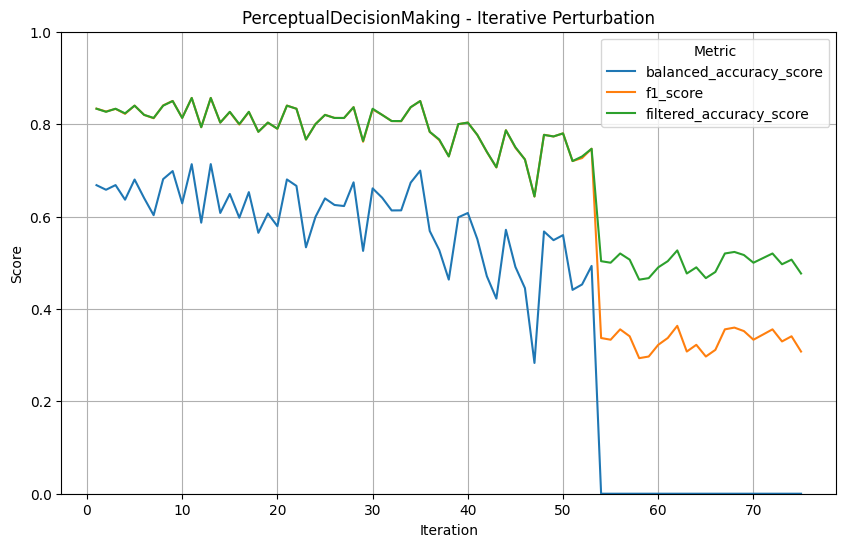

Plot saved to: ./reservoir_results/PerceptualDecisionMaking/results/Saturday1/random/iterative_perturbation_plot_Saturday1_random.png


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

# Number of iterations and nodes to perturb per iteration
n_iterations = 75
nodes_to_perturb = 3

# Copy the original connectivity matrix for perturbation
perturbed_matrix = conn.w.copy()

# List to store iteration results
iteration_results = []

# Initialize input and output nodes
updated_input_nodes = input_nodes.copy()
updated_output_nodes = output_nodes.copy()

for iteration in range(1, n_iterations + 1):
    print(f"\n\t\t\tIteration {iteration}: Perturbing {nodes_to_perturb} Nodes")

    # Select random nodes to perturb, excluding input and output nodes
    all_nodes = set(range(perturbed_matrix.shape[0]))
    non_perturbable_nodes = set(input_nodes).union(set(output_nodes))
    perturbable_nodes = list(all_nodes - non_perturbable_nodes)
    nodes_to_remove = np.random.choice(perturbable_nodes, nodes_to_perturb, replace=False)

    # Print the nodes being removed
    print(f"Nodes to remove: {nodes_to_remove}")

    # Remove the nodes (rows and columns) from the perturbed matrix
    perturbed_matrix = np.delete(perturbed_matrix, nodes_to_remove, axis=0)  # Remove rows
    perturbed_matrix = np.delete(perturbed_matrix, nodes_to_remove, axis=1)  # Remove columns

    # Print the dimensions and number of non-zero elements of the perturbed matrix
    print(f"Iteration {iteration} - Dimensions of perturbed_matrix: {perturbed_matrix.shape}")
    print(f"Iteration {iteration} - Number of non-zero elements in perturbed_matrix: {np.count_nonzero(perturbed_matrix)}")

    # Update the indices of the remaining input/output nodes
    current_nodes = list(range(perturbed_matrix.shape[0]))  # Indices of the current perturbed_matrix
    node_mapping = {old_idx: new_idx for new_idx, old_idx in enumerate(current_nodes)}

    # Remap the updated input and output nodes to their new indices
    updated_input_nodes = [node_mapping[node] for node in updated_input_nodes if node in node_mapping]
    updated_output_nodes = [node_mapping[node] for node in updated_output_nodes if node in node_mapping]

    # Update w_in to match the remaining input nodes
    adjusted_w_in = np.zeros((len(updated_input_nodes), perturbed_matrix.shape[0]))
    for i, node in enumerate(updated_input_nodes):
        if node in node_mapping:
            adjusted_w_in[i, node_mapping[node]] = w_in[i, node]

    # Re-fetch input/output data with the correct dimensions
    task.n_features = len(updated_input_nodes)  # Update the number of features
    x, y = task.fetch_data(n_trials=1000, input_gain=1)  # Re-fetch data
    x = [np.concatenate([i] * n_repeats, axis=1)[:, :len(updated_input_nodes)] for i in x]  # Trim input data
    x_train, x_test, y_train, y_test = readout.train_test_split(x, y)

    # Simulate the reservoir with the perturbed matrix
    perturbed_esn = EchoStateNetwork(w=perturbed_matrix.copy(), activation_function=ACT_FCN)

    # Adjust x_train and x_test for the current matrix
    x_train_adjusted = [
        x[:, :len(updated_input_nodes)] if x.ndim == 2 else x.reshape(-1, len(updated_input_nodes)) 
        for x in x_train
    ]
    x_test_adjusted = [
        x[:, :len(updated_input_nodes)] if x.ndim == 2 else x.reshape(-1, len(updated_input_nodes)) 
        for x in x_test
    ]

    # Simulate the reservoir
    rs_train = perturbed_esn.simulate(
        ext_input=np.vstack(x_train_adjusted), 
        w_in=adjusted_w_in, 
        output_nodes=updated_output_nodes
    )
    rs_test = perturbed_esn.simulate(
        ext_input=np.vstack(x_test_adjusted), 
        w_in=adjusted_w_in, 
        output_nodes=updated_output_nodes
    )

    # Reinitialize the readout module
    readout_module = Readout(estimator=readout.select_model(y))  # Adjust as needed for your `readout` configuration

    # Run the task and collect performance metrics
    df_res = readout_module.run_task(
        X=(rs_train, rs_test), 
        y=(y_train, y_test),
        sample_weight='both',
        metric=METRICS,
        readout_modules=None,
        readout_nodes=None
    )

    # Add iteration, perturbation, and nodes removed information to the results
    df_res['iteration'] = iteration
    df_res['perturbation'] = True
    df_res['perturbed_nodes'] = str(nodes_to_remove)  # Save the perturbed nodes
    iteration_results.append(df_res)

    # Print the results for the current iteration
    print(f"Iteration {iteration} Results:\n", df_res)

# Combine all iteration results into a single DataFrame
df_iteration_results = pd.concat(iteration_results, ignore_index=True)

# Save the results to a CSV file
summary_file = os.path.join(output_dir, 'iterative_perturbation_summary_Saturday1_random.csv')
df_iteration_results.to_csv(summary_file, index=False)
print(f"Summary data saved to: {summary_file}")

# Visualize performance metrics across all iterations
df_melt = pd.melt(
    df_iteration_results,
    id_vars=['iteration'],
    value_vars=['balanced_accuracy_score', 'f1_score', "filtered_accuracy_score"],
    var_name='metric',
    value_name='score'
)

# Plot the performance metrics
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_melt,
    x='iteration', y='score', hue='metric'
)

plt.title(f"{task.name} - Iterative Perturbation")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.ylim(0, 1)  # Ensure the y-axis is scaled between 0 and 1
plt.legend(title='Metric')
plt.grid(True)

# Save the plot
plot_file = os.path.join(output_dir, 'iterative_perturbation_plot_Saturday1_random.png')
plt.savefig(plot_file, dpi=300)
plt.show()

print(f"Plot saved to: {plot_file}")

